# Libraries

In [1]:
import sys
import sklearn
%matplotlib inline
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score, adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor

import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

from sklearn.datasets import make_s_curve, make_swiss_roll
from sklearn.manifold import Isomap, SpectralEmbedding, LocallyLinearEmbedding
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Version

In [2]:
print("Python version")
print(sys.version)
print("Python Version info.")
print(sys.version_info)
print('sklearn: {}'.format(sklearn.__version__))

Python version
3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
Python Version info.
sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)
sklearn: 1.0.2


# Dataset

In [3]:
circle_csv = pd.read_csv("data/circles0.3.csv")
spiral_csv = pd.read_csv("data/spiral1.csv")
moons_csv = pd.read_csv("data/moons1.csv")
halfkernel_csv = pd.read_csv("data/halfkernel.csv")

X_circle = circle_csv[['x1', 'x2']].values
y_circle = circle_csv['label'].values

X_spiral = spiral_csv[['x', 'y']].values
y_spiral = spiral_csv['label'].values

X_moons = moons_csv[['x1', 'x2']].values
y_moons = moons_csv['label'].values

X_halfkernel = halfkernel_csv[['x1', 'x2']].values
y_halfkernel = halfkernel_csv['label'].values

In [4]:
circle_csv_0 = circle_csv[(circle_csv['label'] == 0)]
circle_csv_1 = circle_csv[(circle_csv['label'] == 1)]
cdf_circle_0 = circle_csv_0[['x1', 'x2']]
cdf_circle_1 = circle_csv_1[['x1', 'x2']]

spiral_csv_0 = spiral_csv[(spiral_csv['label'] == 0)]
spiral_csv_1 = spiral_csv[(spiral_csv['label'] == 1)]
cdf_spiral_0 = spiral_csv_0[['x', 'y']]
cdf_spiral_1 = spiral_csv_1[['x', 'y']]

moons_csv_0 = moons_csv[(moons_csv['label'] == 0)]
moons_csv_1 = moons_csv[(moons_csv['label'] == 1)]
moons_cdf_0 = moons_csv_0[['x1', 'x2']]
moons_cdf_1 = moons_csv_1[['x1', 'x2']]

halfkernel_csv_0 = halfkernel_csv[(halfkernel_csv['label'] == 0)]
halfkernel_csv_1 = halfkernel_csv[(halfkernel_csv['label'] == 1)]
halfkernel_cdf_0 = halfkernel_csv_0[['x1', 'x2']]
halfkernel_cdf_1 = halfkernel_csv_1[['x1', 'x2']]

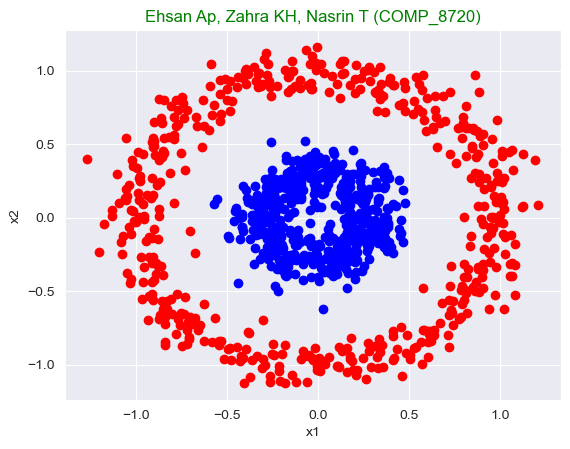

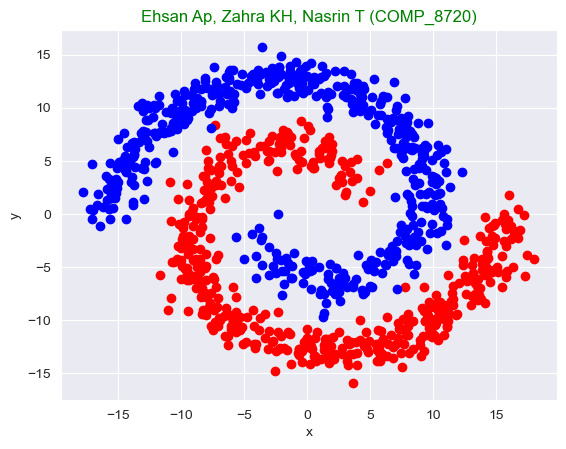

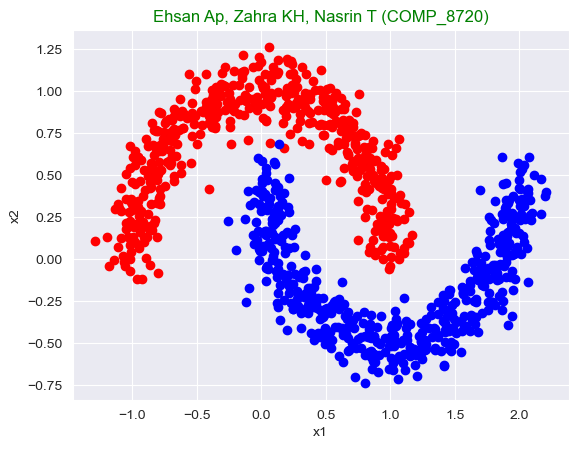

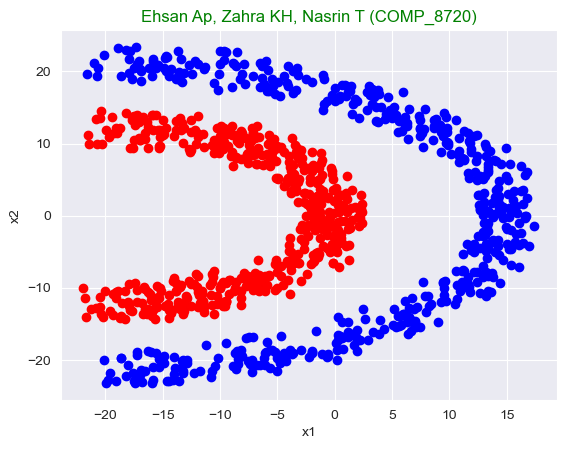

In [5]:
plt.scatter(cdf_circle_0.x1, cdf_circle_0.x2, color='red')
plt.scatter(cdf_circle_1.x1, cdf_circle_1.x2, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

plt.scatter(cdf_spiral_0.x, cdf_spiral_0.y, color='red')
plt.scatter(cdf_spiral_1.x, cdf_spiral_1.y, color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

plt.scatter(moons_csv_0.x1, moons_csv_0.x2, color='red')
plt.scatter(moons_csv_1.x1, moons_csv_1.x2, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

plt.scatter(halfkernel_csv_0.x1, halfkernel_csv_0.x2, color='red')
plt.scatter(halfkernel_csv_1.x1, halfkernel_csv_1.x2, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

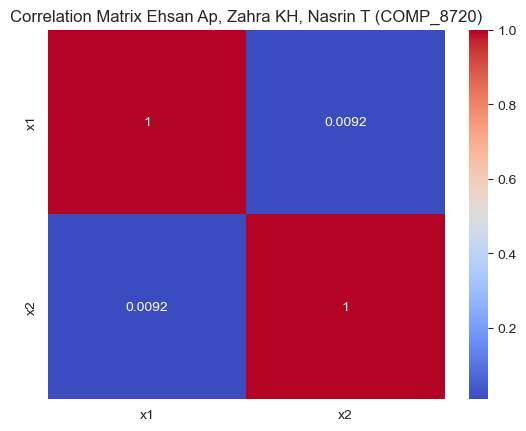

In [6]:
corr_matrix = circle_csv[['x1', 'x2']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')
plt.show()

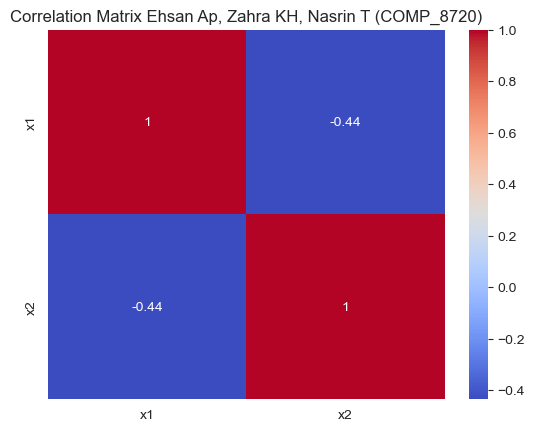

In [7]:
corr_matrix = moons_csv[['x1', 'x2']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')
plt.show()

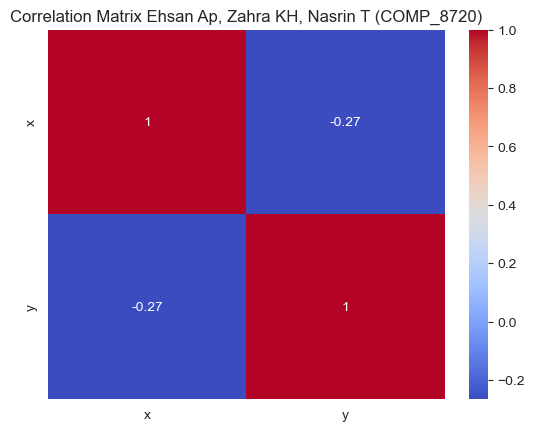

In [8]:
corr_matrix = spiral_csv[['x', 'y']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')
plt.show()

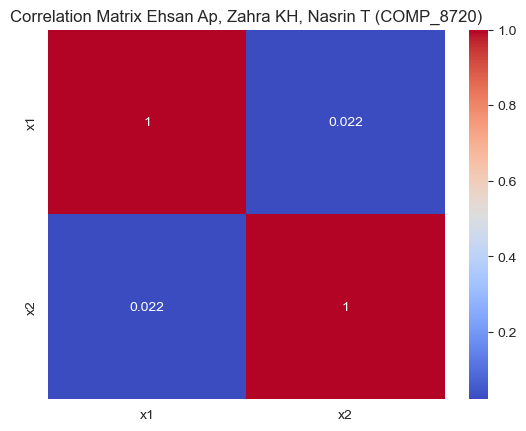

In [9]:
corr_matrix = halfkernel_csv[['x1', 'x2']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')
plt.show()

In [10]:
def calculate_xb_index(X, y, wcss):
    n_samples, n_features = X.shape
    centers = np.zeros((n_clusters, n_features))
    for i in range(n_clusters):
        centers[i] = np.mean(X[y == i], axis=0)
    d = np.sqrt(np.sum((X - centers[y]) ** 2, axis=1))
    return np.sum((d ** 2) / (n_samples * wcss))


def calculate_wcss(X, y):
    wcss = 0
    for k in np.unique(y):
        mask = y == k
        centroid = np.mean(X[mask], axis=0)
        distance = np.sum((X[mask] - centroid) ** 2)
        wcss += distance
    return wcss


def calculate_i_index(X, y):
    wcss = calculate_wcss(X, y)
    n_samples, n_features = X.shape
    n_clusters = len(np.unique(y))
    s = 1 - silhouette_score(X, y)
    if n_clusters > 1:
        return s * np.sqrt(wcss / (n_samples * (n_clusters - 1)))
    else:
        return np.nan

# Circle

In [11]:
X = circle_csv[['x1', 'x2']]
y = circle_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

X_reconstructed = pca.inverse_transform(X_pca)

mse = mean_squared_error(X_std, X_reconstructed)
print("Reconstruction Error: ", mse)

Reconstruction Error:  4.7537654819963713e-32


In [12]:
data = circle_csv
X = data[['x1', 'x2']]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_std, y_train)

y_pred = log_reg.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.33


In [13]:
data = circle_csv
X = data[['x1', 'x2']]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
])

gamma_range = np.concatenate([np.arange(1.1, 2, 0.1), np.arange(2, 51)])

param_grid = [
    {
        "kpca__kernel": ["rbf", "linear","sigmoid"],
        "kpca__gamma": gamma_range
    },
    {
        "kpca__kernel": ["poly"],
        "kpca__gamma": gamma_range,
        "kpca__degree": np.arange(1, 6)
    }
]

grid_search = GridSearchCV(pipeline, param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

results_df = pd.DataFrame(grid_search.cv_results_).sort_values("rank_test_score")
best_params = results_df.iloc[0]["params"]
worst_params = results_df.iloc[-1]["params"]

print("Best parameters:", best_params)
print("Worst parameters:", worst_params)

results_table = results_df[["params", "mean_test_score", "rank_test_score"]].head(1).append(results_df[["params", "mean_test_score", "rank_test_score"]].tail(1))
results_table.columns = ["Parameters", "Mean Test Score", "Rank"]
print(results_table)

Best parameters: {'kpca__gamma': 1.1, 'kpca__kernel': 'rbf'}
Worst parameters: {'kpca__degree': 5, 'kpca__gamma': 3.0, 'kpca__kernel': 'poly'}
                                            Parameters  Mean Test Score  Rank
0          {'kpca__gamma': 1.1, 'kpca__kernel': 'rbf'}           0.9975     1
416  {'kpca__degree': 5, 'kpca__gamma': 3.0, 'kpca_...           0.2675   464


/var/folders/4p/xdy_sybn0wdgj2pz874zr0f00000gn/T/ipykernel_23410/2635510369.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_df[["params", "mean_test_score", "rank_test_score"]].head(1).append(results_df[["params", "mean_test_score", "rank_test_score"]].tail(1))


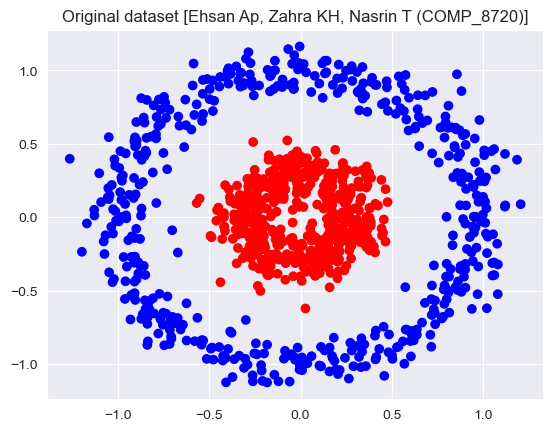

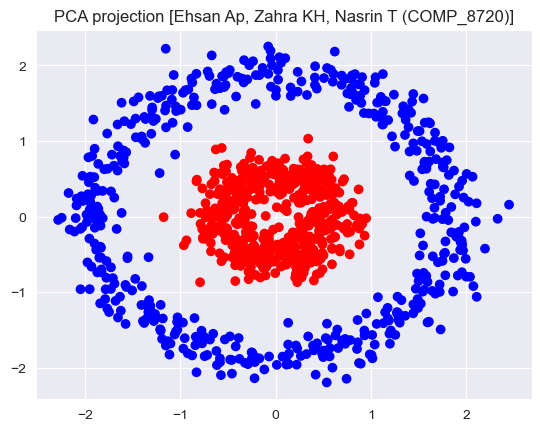

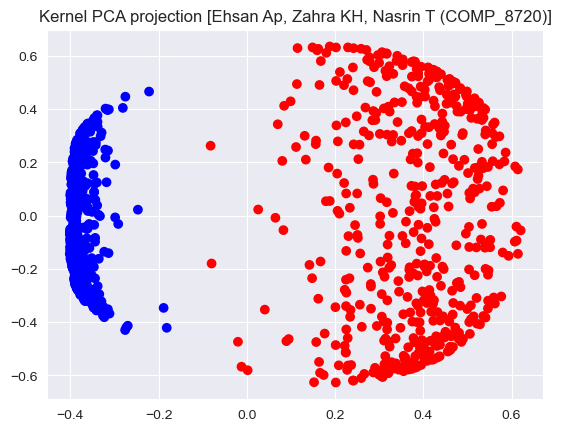

In [14]:
X = circle_csv[['x1', 'x2']]
y = circle_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='bwr')
plt.title('Original dataset [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr')
plt.title('PCA projection [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf',gamma=1.1)
X_kpca = kpca.fit_transform(X_std)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='bwr')
plt.title('Kernel PCA projection [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

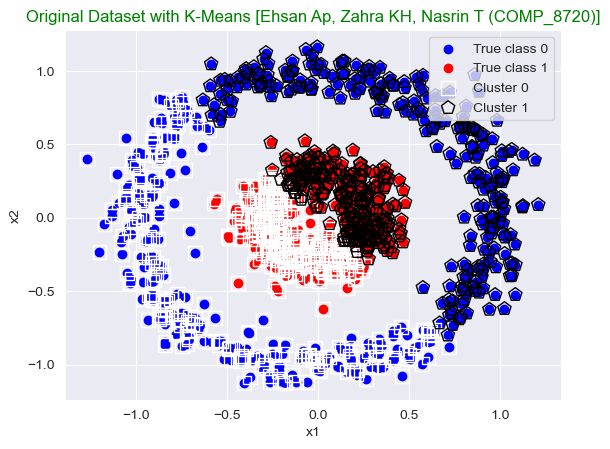

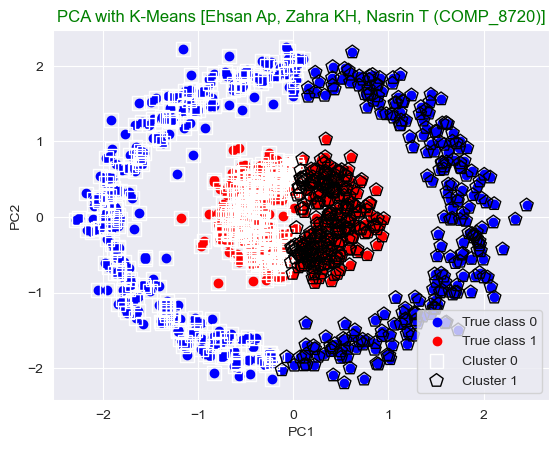

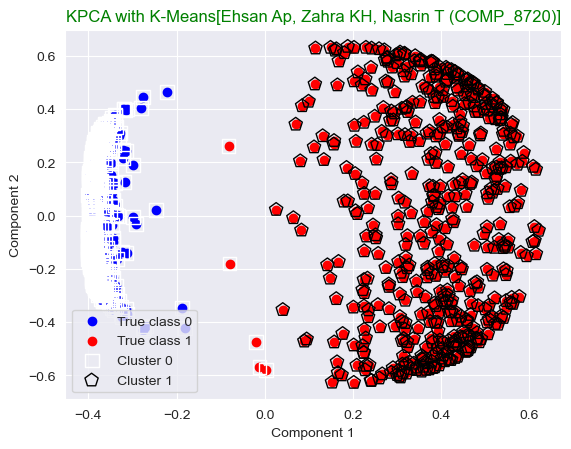

In [15]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_std)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y.unique(), true_colors):
    mask = y == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans.labels_ == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.title("Original Dataset with K-Means [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

kmeans_pca = KMeans(n_clusters=2, random_state=0)
kmeans_pca.fit(X_pca)

fig, ax = plt.subplots()
for label, color in zip(y.unique(), true_colors):
    mask = y == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_pca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_pca.labels_ == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
plt.title("PCA with K-Means [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

kmeans_kpca = KMeans(n_clusters=2, random_state=0)
kmeans_kpca.fit(X_kpca)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y.unique(), true_colors):
    mask = y == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_kpca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_kpca.labels_ == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.legend()
plt.title("KPCA with K-Means[Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

In [16]:
y_pred_pca = kmeans_pca.predict(X_pca)

y_pred_kpca = kmeans_kpca.predict(X_kpca)

db_score_pca = davies_bouldin_score(X_pca, y_pred_pca)
db_score_kpca = davies_bouldin_score(X_kpca, y_pred_kpca)
ch_score_pca = calinski_harabasz_score(X_pca, y_pred_pca)
ch_score_kpca = calinski_harabasz_score(X_kpca, y_pred_kpca)
silhouette_pca = silhouette_score(X_pca, y_pred_pca)
silhouette_kpca = silhouette_score(X_kpca, y_pred_kpca)
ari_pca = adjusted_rand_score(y, y_pred_pca)
ari_kpca = adjusted_rand_score(y, y_pred_kpca)

n_clusters = 2
wcss_pca = kmeans_pca.inertia_
wcss_kpca = kmeans_kpca.inertia_

xb_score_pca = calculate_xb_index(X_pca, y_pred_pca, wcss_pca)
xb_score_kpca = calculate_xb_index(X_kpca, y_pred_kpca, wcss_kpca)
i_score_pca = calculate_i_index(X_pca, y_pred_pca)
i_score_kpca = calculate_i_index(X_kpca, y_pred_kpca)

scores = pd.DataFrame({
    'Metric': ['Davies-Bouldin', 'Calinski-Harabasz', 'Silhouette', 'Adjusted Rand Index', 'Xie-Beni Index', 'Index I'],
    'PCA': [db_score_pca, ch_score_pca, silhouette_pca, ari_pca, xb_score_pca, i_score_pca],
    'Kernel PCA': [db_score_kpca, ch_score_kpca, silhouette_kpca, ari_kpca, xb_score_kpca, i_score_kpca]
})
print(scores)

                Metric         PCA   Kernel PCA
0       Davies-Bouldin    1.309131     0.763519
1    Calinski-Harabasz  461.770299  1300.851861
2           Silhouette    0.290160     0.564711
3  Adjusted Rand Index   -0.000986     0.980080
4       Xie-Beni Index    0.001000     0.001000
5              Index I    0.830039     0.143071


# Moons

In [17]:
X = moons_csv[['x1', 'x2']]
y = moons_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

X_reconstructed = pca.inverse_transform(X_pca)

mse = mean_squared_error(X_std, X_reconstructed)
print("Reconstruction Error: ", mse)

Reconstruction Error:  3.603595115126567e-32


In [18]:
data = moons_csv
X = data[['x1', 'x2']]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_std, y_train)

y_pred = log_reg.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.87


In [19]:
data = moons_csv
X = data[['x1', 'x2']]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
])

gamma_range = np.concatenate([np.arange(1.1, 2, 0.1), np.arange(2, 51)])

param_grid = [
    {
        "kpca__kernel": ["rbf", "linear","sigmoid"],
        "kpca__gamma": gamma_range
    },
    {
        "kpca__kernel": ["poly"],
        "kpca__gamma": gamma_range,
        "kpca__degree": np.arange(1, 6)
    }
]

grid_search = GridSearchCV(pipeline, param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

results_df = pd.DataFrame(grid_search.cv_results_).sort_values("rank_test_score")
best_params = results_df.iloc[0]["params"]
worst_params = results_df.iloc[-1]["params"]

print("Best parameters:", best_params)
print("Worst parameters:", worst_params)

results_table = results_df[["params", "mean_test_score", "rank_test_score"]].head(1).append(results_df[["params", "mean_test_score", "rank_test_score"]].tail(1))
results_table.columns = ["Parameters", "Mean Test Score", "Rank"]
print(results_table)

Best parameters: {'kpca__gamma': 5.0, 'kpca__kernel': 'rbf'}
Worst parameters: {'kpca__degree': 4, 'kpca__gamma': 48.0, 'kpca__kernel': 'poly'}
                                            Parameters  Mean Test Score  Rank
36         {'kpca__gamma': 5.0, 'kpca__kernel': 'rbf'}          0.92125     1
403  {'kpca__degree': 4, 'kpca__gamma': 48.0, 'kpca...          0.51500   458


/var/folders/4p/xdy_sybn0wdgj2pz874zr0f00000gn/T/ipykernel_23410/1042237755.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_df[["params", "mean_test_score", "rank_test_score"]].head(1).append(results_df[["params", "mean_test_score", "rank_test_score"]].tail(1))


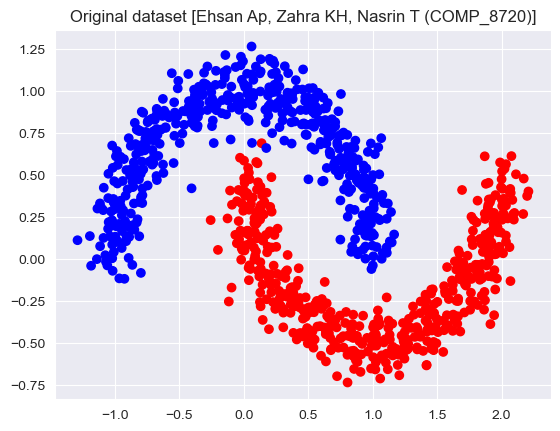

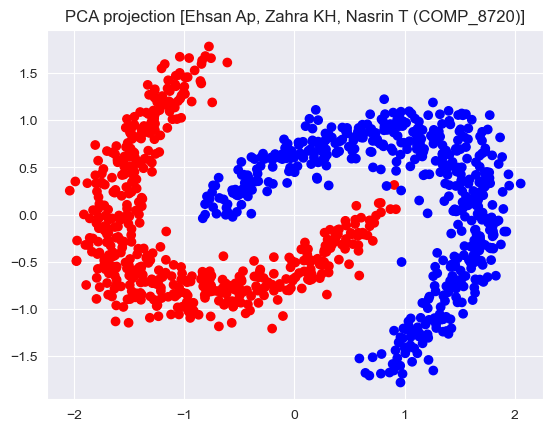

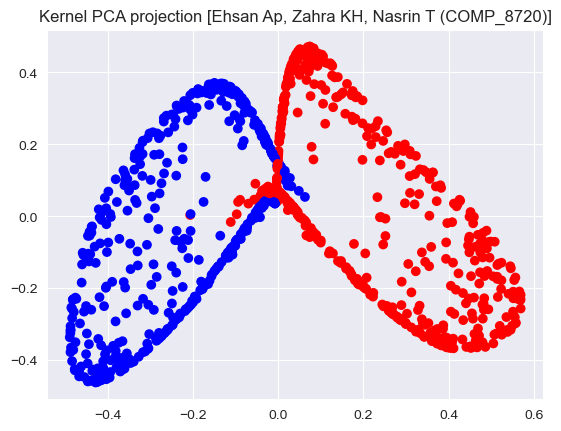

In [20]:
X = moons_csv[['x1', 'x2']]
y = moons_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='bwr')
plt.title('Original dataset [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr')
plt.title('PCA projection [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=5)
X_kpca = kpca.fit_transform(X_std)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='bwr')
plt.title('Kernel PCA projection [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

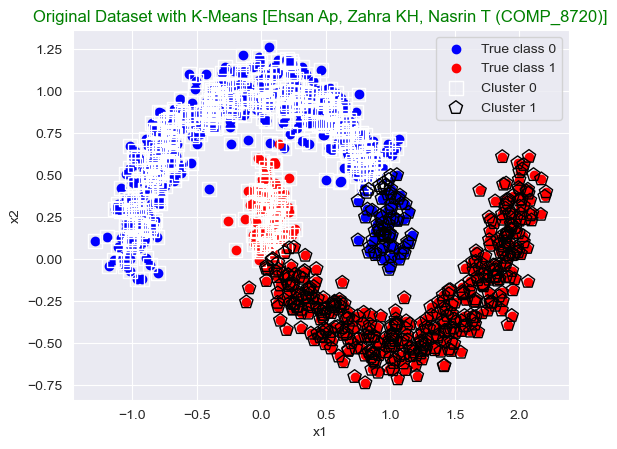

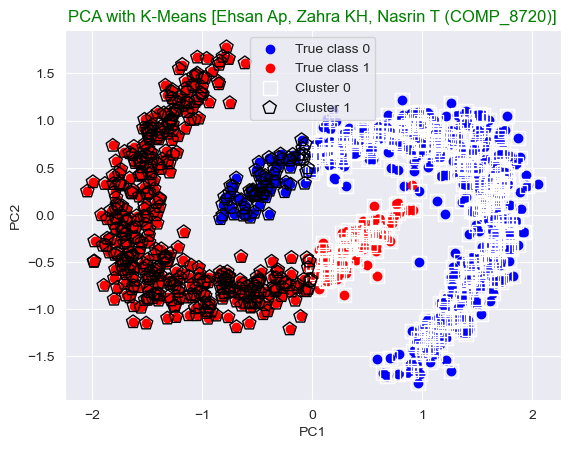

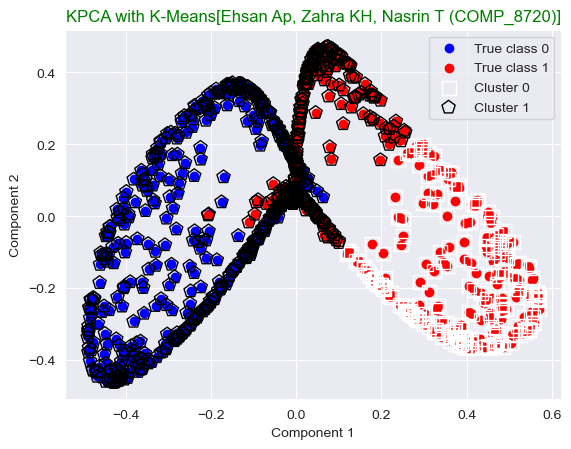

In [21]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_std)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y.unique(), true_colors):
    mask = y == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans.labels_ == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.title("Original Dataset with K-Means [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

kmeans_pca = KMeans(n_clusters=2, random_state=0)
kmeans_pca.fit(X_pca)

fig, ax = plt.subplots()
for label, color in zip(y.unique(), true_colors):
    mask = y == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_pca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_pca.labels_ == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
plt.title("PCA with K-Means [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

kmeans_kpca = KMeans(n_clusters=2, random_state=0)
kmeans_kpca.fit(X_kpca)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y.unique(), true_colors):
    mask = y == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_kpca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_kpca.labels_ == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.legend()
plt.title("KPCA with K-Means[Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

In [22]:
y_pred_pca = kmeans_pca.predict(X_pca)

y_pred_kpca = kmeans_kpca.predict(X_kpca)

db_score_pca = davies_bouldin_score(X_pca, y_pred_pca)
db_score_kpca = davies_bouldin_score(X_kpca, y_pred_kpca)
ch_score_pca = calinski_harabasz_score(X_pca, y_pred_pca)
ch_score_kpca = calinski_harabasz_score(X_kpca, y_pred_kpca)
silhouette_pca = silhouette_score(X_pca, y_pred_pca)
silhouette_kpca = silhouette_score(X_kpca, y_pred_kpca)
ari_pca = adjusted_rand_score(y, y_pred_pca)
ari_kpca = adjusted_rand_score(y, y_pred_kpca)

n_clusters = 2
wcss_pca = kmeans_pca.inertia_
wcss_kpca = kmeans_kpca.inertia_

xb_score_pca = calculate_xb_index(X_pca, y_pred_pca, wcss_pca)
xb_score_kpca = calculate_xb_index(X_kpca, y_pred_kpca, wcss_kpca)
i_score_pca = calculate_i_index(X_pca, y_pred_pca)
i_score_kpca = calculate_i_index(X_kpca, y_pred_kpca)

scores = pd.DataFrame({
    'Metric': ['Davies-Bouldin', 'Calinski-Harabasz', 'Silhouette', 'Adjusted Rand Index', 'Xie-Beni Index', 'Index I'],
    'PCA': [db_score_pca, ch_score_pca, silhouette_pca, ari_pca, xb_score_pca, i_score_pca],
    'Kernel PCA': [db_score_kpca, ch_score_kpca, silhouette_kpca, ari_kpca, xb_score_kpca, i_score_kpca]
})
print(scores)

                Metric          PCA  Kernel PCA
0       Davies-Bouldin     0.816856    0.817405
1    Calinski-Harabasz  1346.593923  711.639708
2           Silhouette     0.488802    0.452079
3  Adjusted Rand Index     0.486690    0.247441
4       Xie-Beni Index     0.001000    0.001000
5              Index I     0.471668    0.155567


# Spiral

In [23]:
X = spiral_csv[['x', 'y']]
y = spiral_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

X_reconstructed = pca.inverse_transform(X_pca)

mse = mean_squared_error(X_std, X_reconstructed)
print("Reconstruction Error: ", mse)

Reconstruction Error:  2.9885173151986356e-32


In [24]:
data = spiral_csv
X = data[['x', 'y']]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_std, y_train)

y_pred = log_reg.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.76


In [25]:
data = spiral_csv
X = data[['x', 'y']]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
])

gamma_range = np.concatenate([np.arange(1.1, 2, 0.1), np.arange(2, 51)])

param_grid = [
    {
        "kpca__kernel": ["rbf", "linear","sigmoid"],
        "kpca__gamma": gamma_range
    },
    {
        "kpca__kernel": ["poly"],
        "kpca__gamma": gamma_range,
        "kpca__degree": np.arange(1, 6)
    }
]

grid_search = GridSearchCV(pipeline, param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

results_df = pd.DataFrame(grid_search.cv_results_).sort_values("rank_test_score")
best_params = results_df.iloc[0]["params"]
worst_params = results_df.iloc[-1]["params"]

print("Best parameters:", best_params)
print("Worst parameters:", worst_params)

results_table = results_df[["params", "mean_test_score", "rank_test_score"]].head(1).append(results_df[["params", "mean_test_score", "rank_test_score"]].tail(1))
results_table.columns = ["Parameters", "Mean Test Score", "Rank"]
print(results_table)

Best parameters: {'kpca__degree': 5, 'kpca__gamma': 17.0, 'kpca__kernel': 'poly'}
Worst parameters: {'kpca__degree': 2, 'kpca__gamma': 6.0, 'kpca__kernel': 'poly'}
                                            Parameters  Mean Test Score  Rank
430  {'kpca__degree': 5, 'kpca__gamma': 17.0, 'kpca...          0.77125     1
245  {'kpca__degree': 2, 'kpca__gamma': 6.0, 'kpca_...          0.48375   463


/var/folders/4p/xdy_sybn0wdgj2pz874zr0f00000gn/T/ipykernel_23410/710651978.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_df[["params", "mean_test_score", "rank_test_score"]].head(1).append(results_df[["params", "mean_test_score", "rank_test_score"]].tail(1))


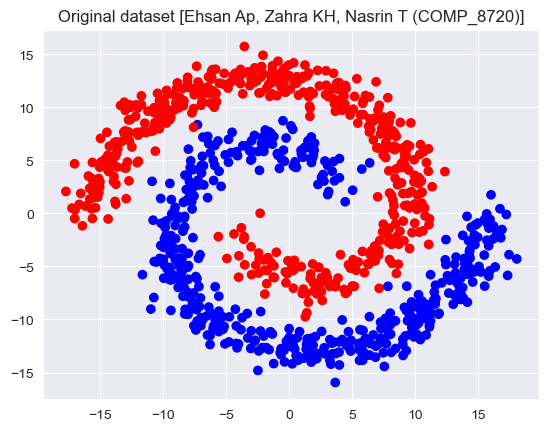

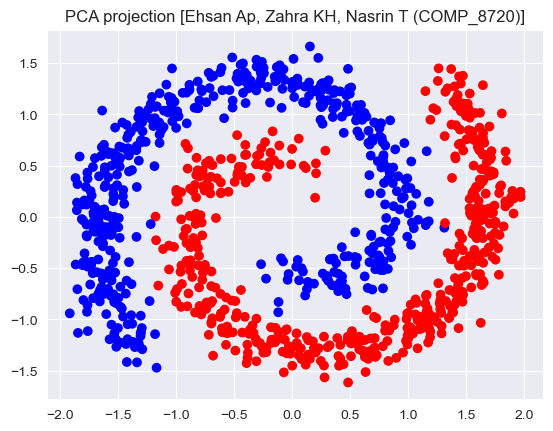

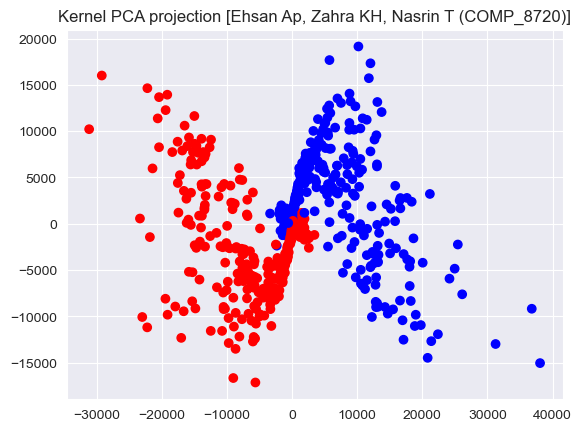

In [26]:
X = spiral_csv[['x', 'y']]
y = spiral_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='bwr')
plt.title('Original dataset [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr')
plt.title('PCA projection [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

kpca = KernelPCA(n_components=2, kernel='poly',degree=5,gamma=15)
X_kpca = kpca.fit_transform(X_std)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='bwr')
plt.title('Kernel PCA projection [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

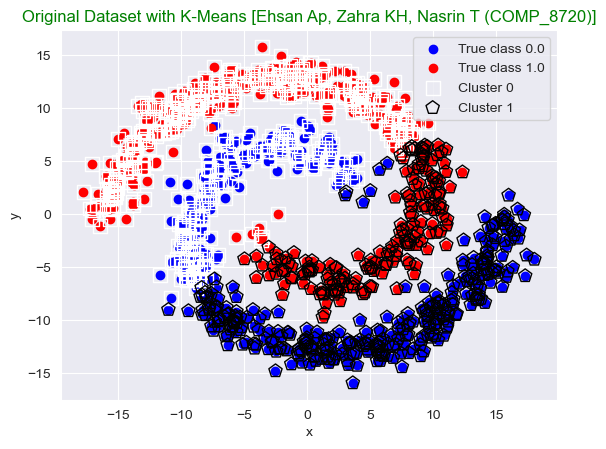

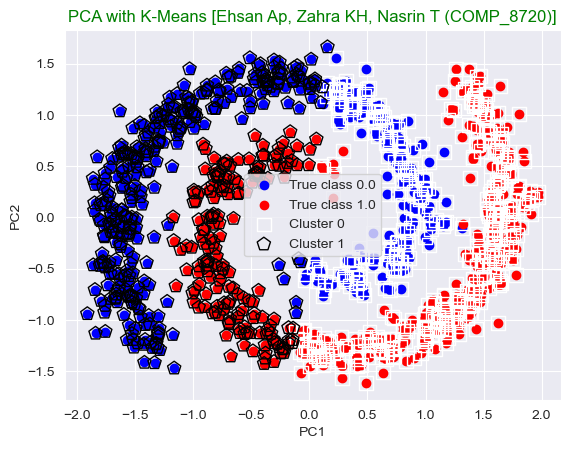

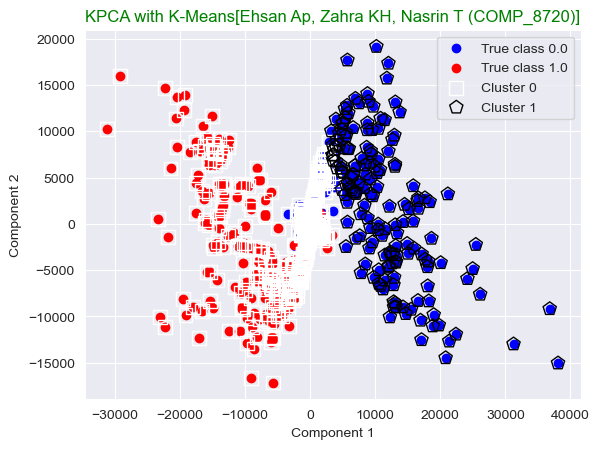

In [27]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_std)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y.unique(), true_colors):
    mask = y == label
    ax.scatter(X[mask]['x'], X[mask]['y'], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans.labels_ == label
    ax.scatter(X[mask]['x'], X[mask]['y'], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.title("Original Dataset with K-Means [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

kmeans_pca = KMeans(n_clusters=2, random_state=0)
kmeans_pca.fit(X_pca)

fig, ax = plt.subplots()
for label, color in zip(y.unique(), true_colors):
    mask = y == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_pca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_pca.labels_ == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
plt.title("PCA with K-Means [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

kmeans_kpca = KMeans(n_clusters=2, random_state=0)
kmeans_kpca.fit(X_kpca)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y.unique(), true_colors):
    mask = y == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_kpca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_kpca.labels_ == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.legend()
plt.title("KPCA with K-Means[Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

In [28]:
y_pred_pca = kmeans_pca.predict(X_pca)

y_pred_kpca = kmeans_kpca.predict(X_kpca)

db_score_pca = davies_bouldin_score(X_pca, y_pred_pca)
db_score_kpca = davies_bouldin_score(X_kpca, y_pred_kpca)
ch_score_pca = calinski_harabasz_score(X_pca, y_pred_pca)
ch_score_kpca = calinski_harabasz_score(X_kpca, y_pred_kpca)
silhouette_pca = silhouette_score(X_pca, y_pred_pca)
silhouette_kpca = silhouette_score(X_kpca, y_pred_kpca)
ari_pca = adjusted_rand_score(y, y_pred_pca)
ari_kpca = adjusted_rand_score(y, y_pred_kpca)

n_clusters = 2
wcss_pca = kmeans_pca.inertia_
wcss_kpca = kmeans_kpca.inertia_

xb_score_pca = calculate_xb_index(X_pca, y_pred_pca, wcss_pca)
xb_score_kpca = calculate_xb_index(X_kpca, y_pred_kpca, wcss_kpca)
i_score_pca = calculate_i_index(X_pca, y_pred_pca)
i_score_kpca = calculate_i_index(X_kpca, y_pred_kpca)

scores = pd.DataFrame({
    'Metric': ['Davies-Bouldin', 'Calinski-Harabasz', 'Silhouette', 'Adjusted Rand Index', 'Xie-Beni Index', 'Index I'],
    'PCA': [db_score_pca, ch_score_pca, silhouette_pca, ari_pca, xb_score_pca, i_score_pca],
    'Kernel PCA': [db_score_kpca, ch_score_kpca, silhouette_kpca, ari_kpca, xb_score_kpca, i_score_kpca]
})
print(scores)

                Metric         PCA   Kernel PCA
0       Davies-Bouldin    0.949054     0.968793
1    Calinski-Harabasz  956.888294   513.931113
2           Silhouette    0.436351     0.551599
3  Adjusted Rand Index    0.084347     0.112399
4       Xie-Beni Index    0.001000     0.001000
5              Index I    0.569545  3209.516387


# Halfkernel

In [29]:
X = halfkernel_csv[['x1', 'x2']]
y = halfkernel_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

X_reconstructed = pca.inverse_transform(X_pca)

mse = mean_squared_error(X_std, X_reconstructed)
print("Reconstruction Error: ", mse)

Reconstruction Error:  4.977804069681791e-32


In [30]:
data = halfkernel_csv
X = data[['x1', 'x2']]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_std, y_train)

y_pred = log_reg.predict(X_test_std)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.71


In [31]:
data = halfkernel_csv
X = data[['x1', 'x2']]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
])

gamma_range = np.concatenate([np.arange(1.1, 2, 0.1), np.arange(2, 51)])

param_grid = [
    {
        "kpca__kernel": ["rbf", "linear","sigmoid"],
        "kpca__gamma": gamma_range
    },
    {
        "kpca__kernel": ["poly"],
        "kpca__gamma": gamma_range,
        "kpca__degree": np.arange(1, 6)
    }
]

grid_search = GridSearchCV(pipeline, param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

results_df = pd.DataFrame(grid_search.cv_results_).sort_values("rank_test_score")
best_params = results_df.iloc[0]["params"]
worst_params = results_df.iloc[-1]["params"]

print("Best parameters:", best_params)
print("Worst parameters:", worst_params)

results_table = results_df[["params", "mean_test_score", "rank_test_score"]].head(1).append(results_df[["params", "mean_test_score", "rank_test_score"]].tail(1))
results_table.columns = ["Parameters", "Mean Test Score", "Rank"]
print(results_table)

Best parameters: {'kpca__gamma': 1.1, 'kpca__kernel': 'rbf'}
Worst parameters: {'kpca__degree': 5, 'kpca__gamma': 7.0, 'kpca__kernel': 'poly'}
                                            Parameters  Mean Test Score  Rank
0          {'kpca__gamma': 1.1, 'kpca__kernel': 'rbf'}          0.81375     1
420  {'kpca__degree': 5, 'kpca__gamma': 7.0, 'kpca_...          0.51375   463


/var/folders/4p/xdy_sybn0wdgj2pz874zr0f00000gn/T/ipykernel_23410/4275618560.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_table = results_df[["params", "mean_test_score", "rank_test_score"]].head(1).append(results_df[["params", "mean_test_score", "rank_test_score"]].tail(1))


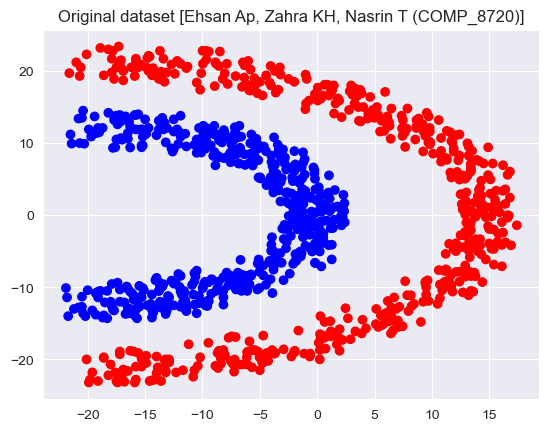

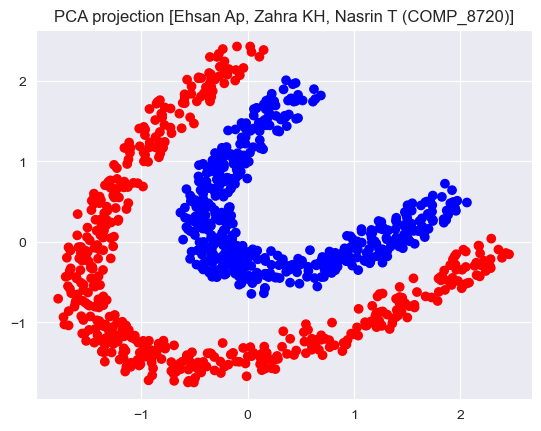

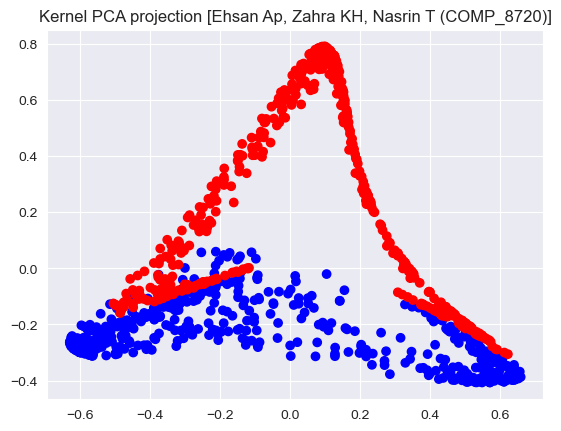

In [32]:
X = halfkernel_csv[['x1', 'x2']]
y = halfkernel_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='bwr')
plt.title('Original dataset [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr')
plt.title('PCA projection [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf',gamma=1.1)
X_kpca = kpca.fit_transform(X_std)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='bwr')
plt.title('Kernel PCA projection [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

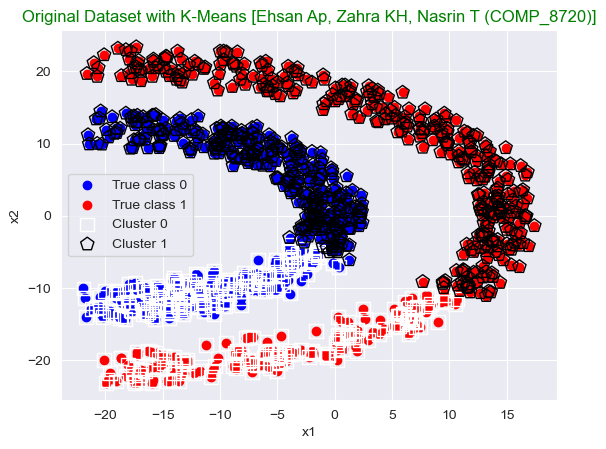

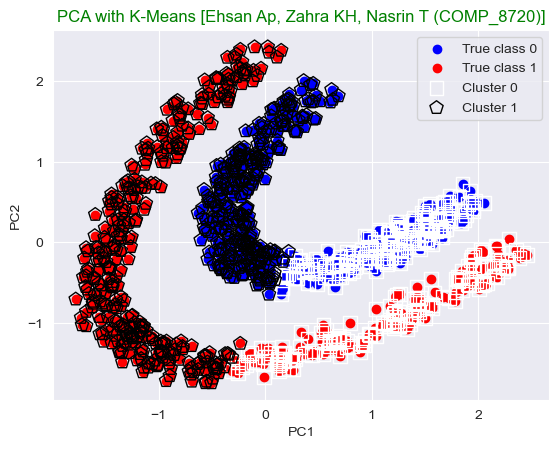

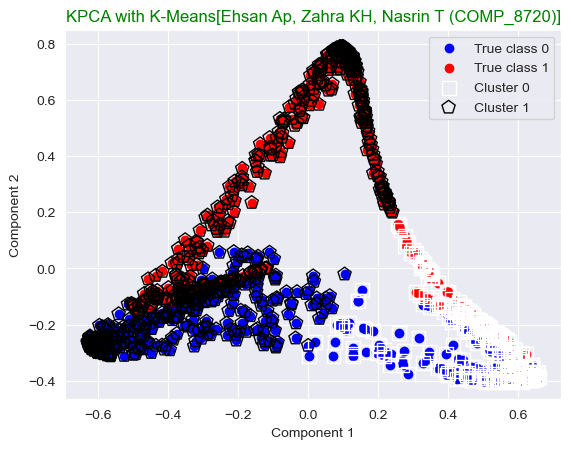

In [33]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_std)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y.unique(), true_colors):
    mask = y == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans.labels_ == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.title("Original Dataset with K-Means [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

kmeans_pca = KMeans(n_clusters=2, random_state=0)
kmeans_pca.fit(X_pca)

fig, ax = plt.subplots()
for label, color in zip(y.unique(), true_colors):
    mask = y == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_pca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_pca.labels_ == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
plt.title("PCA with K-Means [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

kmeans_kpca = KMeans(n_clusters=2, random_state=0)
kmeans_kpca.fit(X_kpca)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y.unique(), true_colors):
    mask = y == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_kpca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_kpca.labels_ == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.legend()
plt.title("KPCA with K-Means[Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

In [34]:
y_pred_pca = kmeans_pca.predict(X_pca)

y_pred_kpca = kmeans_kpca.predict(X_kpca)

db_score_pca = davies_bouldin_score(X_pca, y_pred_pca)
db_score_kpca = davies_bouldin_score(X_kpca, y_pred_kpca)
ch_score_pca = calinski_harabasz_score(X_pca, y_pred_pca)
ch_score_kpca = calinski_harabasz_score(X_kpca, y_pred_kpca)
silhouette_pca = silhouette_score(X_pca, y_pred_pca)
silhouette_kpca = silhouette_score(X_kpca, y_pred_kpca)
ari_pca = adjusted_rand_score(y, y_pred_pca)
ari_kpca = adjusted_rand_score(y, y_pred_kpca)

n_clusters = 3
wcss_pca = kmeans_pca.inertia_
wcss_kpca = kmeans_kpca.inertia_

xb_score_pca = calculate_xb_index(X_pca, y_pred_pca, wcss_pca)
xb_score_kpca = calculate_xb_index(X_kpca, y_pred_kpca, wcss_kpca)
i_score_pca = calculate_i_index(X_pca, y_pred_pca)
i_score_kpca = calculate_i_index(X_kpca, y_pred_kpca)

scores = pd.DataFrame({
    'Metric': ['Davies-Bouldin', 'Calinski-Harabasz', 'Silhouette', 'Adjusted Rand Index', 'Xie-Beni Index', 'Index I'],
    'PCA': [db_score_pca, ch_score_pca, silhouette_pca, ari_pca, xb_score_pca, i_score_pca],
    'Kernel PCA': [db_score_kpca, ch_score_kpca, silhouette_kpca, ari_kpca, xb_score_kpca, i_score_kpca]
})
print(scores)

                Metric         PCA  Kernel PCA
0       Davies-Bouldin    1.024780    0.763338
1    Calinski-Harabasz  629.925850  811.480006
2           Silhouette    0.385213    0.485533
3  Adjusted Rand Index    0.000116    0.011249
4       Xie-Beni Index    0.001000    0.001000
5              Index I    0.680750    0.200100


/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


# Applying On S_Shape

In [35]:
X_s_shape, y_s_shape = make_s_curve(n_samples=1500, random_state=0)

/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_

        Isomap  Laplacian Eigenmaps       LLE
K                                            
3.0   0.136056             0.075960  0.445650
7.0   0.059195             0.320700  0.112750
12.0  0.058794             0.408770  0.074189
17.0  0.059756             0.434488  0.091168

Best K values for each method:
Isomap                 12.0
Laplacian Eigenmaps     3.0
LLE                    12.0
dtype: float64


/var/folders/4p/xdy_sybn0wdgj2pz874zr0f00000gn/T/ipykernel_23410/2801184888.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison_table = comparison_table.append({"K": k, **errors}, ignore_index=True)


<Figure size 640x480 with 0 Axes>

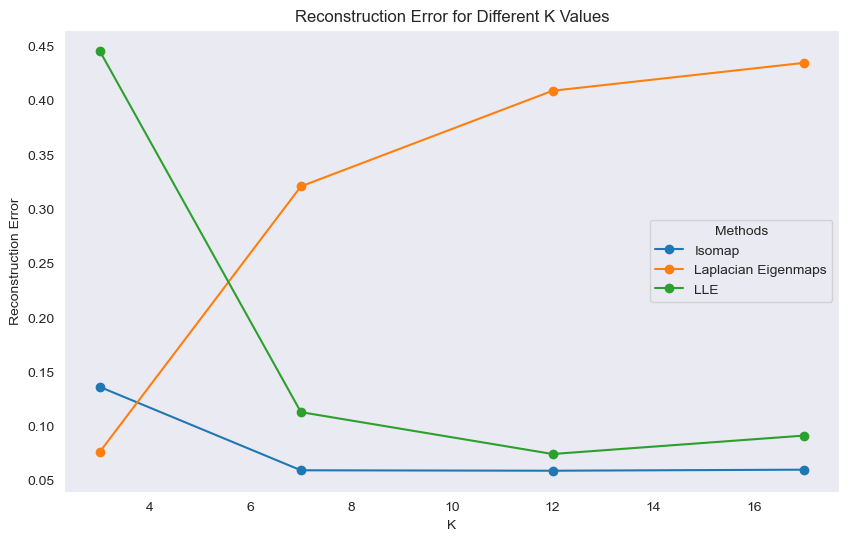

In [36]:
def reconstruction_error(X_original, X_transformed, n_neighbors):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_transformed, X_original)
    X_reconstructed = knn.predict(X_transformed)
    return np.mean(np.linalg.norm(X_original - X_reconstructed, axis=1))


def apply_manifold_learning(X, y, k):
    methods = {
        "Isomap": Isomap(n_neighbors=k, n_components=n_components),
        "Laplacian Eigenmaps": SpectralEmbedding(n_components=n_components, n_neighbors=k),
        "LLE": LocallyLinearEmbedding(n_neighbors=k, n_components=n_components)
    }

    errors = {}
    for method_name, method in methods.items():
        X_transformed = method.fit_transform(X)
        error = reconstruction_error(X, X_transformed, k)
        errors[method_name] = error

    return errors


n_components = 2
k_values = [3, 7, 12, 17]

comparison_table = pd.DataFrame(columns=["K", "Isomap", "Laplacian Eigenmaps", "LLE"])

for k in k_values:
    errors = apply_manifold_learning(X_s_shape, y_s_shape, k)
    comparison_table = comparison_table.append({"K": k, **errors}, ignore_index=True)

comparison_table.set_index("K", inplace=True)
print(comparison_table)

best_k_values = comparison_table.idxmin()
print("\nBest K values for each method:")
print(best_k_values)

plt.figure()
comparison_table.plot(marker='o', figsize=(10, 6))
plt.xlabel("K")
plt.ylabel("Reconstruction Error")
plt.title("Reconstruction Error for Different K Values")
plt.legend(title="Methods")
plt.grid()
plt.show()

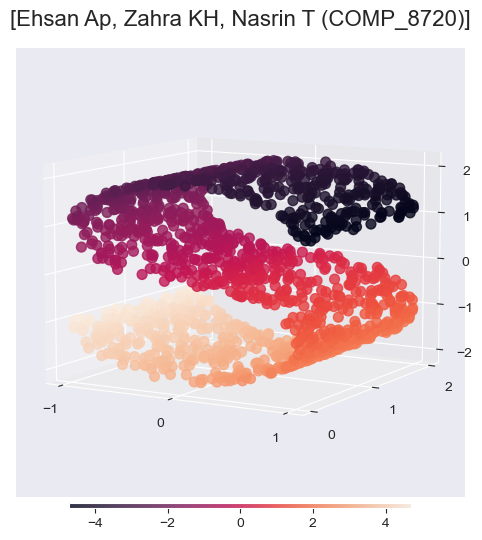

In [37]:
from matplotlib import ticker
from sklearn import manifold, datasets

n_samples = 1500
S_points, S_color = datasets.make_s_curve(n_samples, random_state=0)


def plot_3d(points, points_color, title):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(6, 6),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))

    fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    plt.show()


def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()


def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())


plot_3d(S_points, S_color, "[Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]")

In [38]:
n_neighbors = 12
n_components = 2

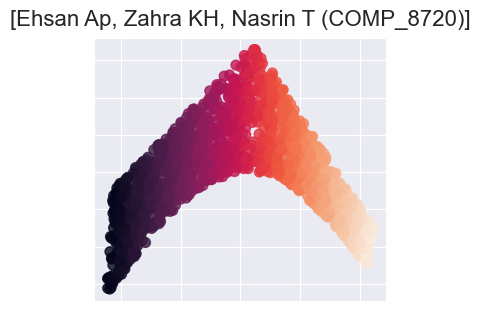

In [39]:
params = {
    "n_neighbors": 12,
    "n_components": n_components,
    "eigen_solver": "auto",
    "random_state": 0,
}

lle_standard = manifold.LocallyLinearEmbedding(method="standard", **params)
S_standard = lle_standard.fit_transform(S_points)

plot_2d(S_standard, S_color, "[Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]")

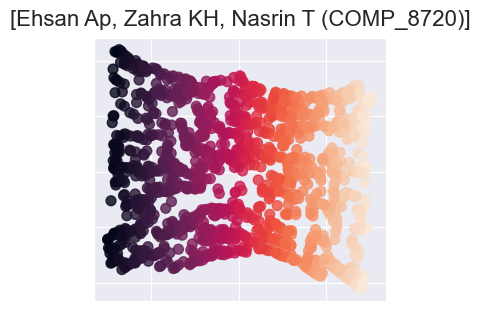

In [40]:
isomap = manifold.Isomap(n_neighbors=7, n_components=n_components, p=1)
S_isomap = isomap.fit_transform(S_points)

plot_2d(S_isomap, S_color, "[Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]")

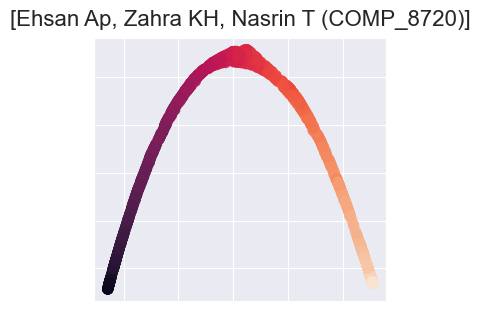

In [41]:
spectral = manifold.SpectralEmbedding(n_components=n_components, n_neighbors=10)
S_spectral = spectral.fit_transform(S_points)

plot_2d(S_spectral, S_color, "[Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]")

# Applying On Swiss_Role

In [42]:
X_swiss_roll, y_swiss_roll = make_swiss_roll(n_samples=1000, random_state=0)

/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_

        Isomap  Laplacian Eigenmaps       LLE
K                                            
3.0   1.159390             0.650615  3.507589
5.0   0.718989             2.782590  3.031273
10.0  0.740427             4.490325  0.820546
15.0  0.746860             4.735073  0.966457
20.0  1.672732             3.734314  5.755948
30.0  5.006830             3.350738  4.053076

Best K values for each method:
Isomap                  5.0
Laplacian Eigenmaps     3.0
LLE                    10.0
dtype: float64


/var/folders/4p/xdy_sybn0wdgj2pz874zr0f00000gn/T/ipykernel_23410/853364783.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison_table = comparison_table.append({"K": k, **errors}, ignore_index=True)


<Figure size 640x480 with 0 Axes>

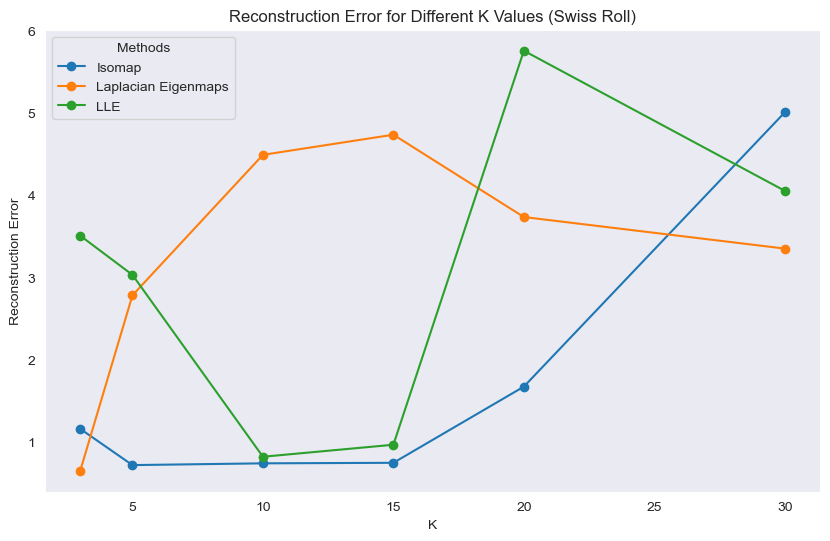

In [43]:
def reconstruction_error(X_original, X_transformed, n_neighbors):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_transformed, X_original)
    X_reconstructed = knn.predict(X_transformed)
    return np.mean(np.linalg.norm(X_original - X_reconstructed, axis=1))


def apply_manifold_learning(X, y, k):
    methods = {
        "Isomap": Isomap(n_neighbors=k, n_components=n_components),
        "Laplacian Eigenmaps": SpectralEmbedding(n_components=n_components, affinity='nearest_neighbors',
                                                 n_neighbors=k),
        "LLE": LocallyLinearEmbedding(n_neighbors=k, n_components=n_components)
    }

    errors = {}
    for method_name, method in methods.items():
        X_transformed = method.fit_transform(X)
        error = reconstruction_error(X, X_transformed, k)
        errors[method_name] = error

    return errors


n_components = 2
k_values = [3, 5, 10, 15, 20, 30]

comparison_table = pd.DataFrame(columns=["K", "Isomap", "Laplacian Eigenmaps", "LLE"])

for k in k_values:
    errors = apply_manifold_learning(X_swiss_roll, y_swiss_roll, k)
    comparison_table = comparison_table.append({"K": k, **errors}, ignore_index=True)

comparison_table.set_index("K", inplace=True)
print(comparison_table)

best_k_values = comparison_table.idxmin()
print("\nBest K values for each method:")
print(best_k_values)

plt.figure()
comparison_table.plot(marker='o', figsize=(10, 6))
plt.xlabel("K")
plt.ylabel("Reconstruction Error")
plt.title("Reconstruction Error for Different K Values (Swiss Roll)")
plt.legend(title="Methods")
plt.grid()
plt.show()

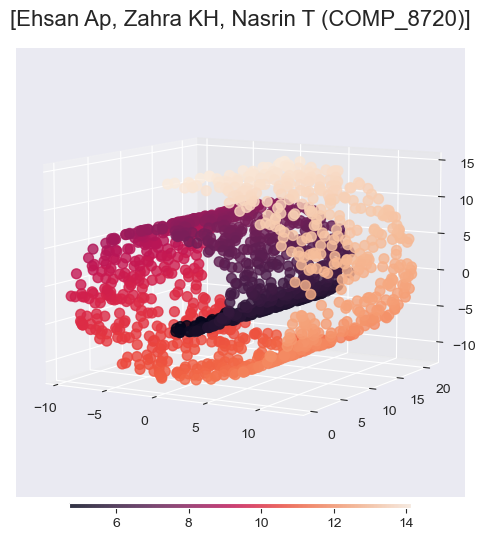

In [44]:
n_samples = 1500
swiss_roll, swiss_roll_color = datasets.make_swiss_roll(n_samples, random_state=0)


def plot_3d(points, points_color, title):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(6, 6),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(5))

    fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    plt.show()


def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()


def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())


plot_3d(swiss_roll, swiss_roll_color, "[Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]")

In [45]:
n_neighbors = 12
n_components = 2

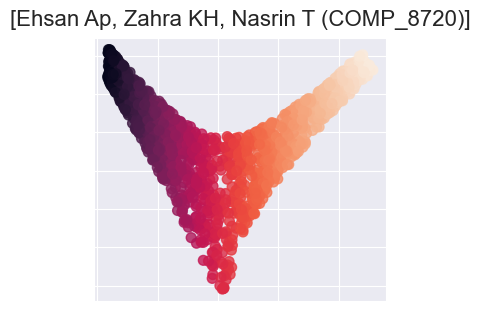

In [46]:
params = {
    "n_neighbors": 10,
    "n_components": n_components,
    "eigen_solver": "auto",
    "random_state": 0,
}

lle_standard = manifold.LocallyLinearEmbedding(method="standard", **params)
S_standard = lle_standard.fit_transform(swiss_roll)
plot_2d(S_standard, swiss_roll_color, "[Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]")

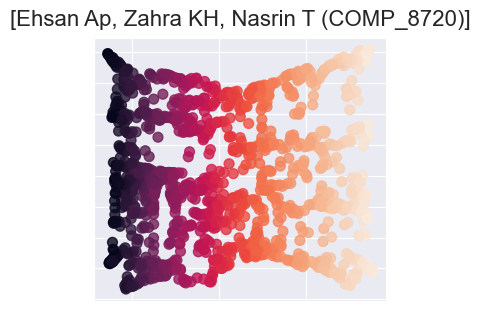

In [47]:
isomap = manifold.Isomap(n_neighbors=5, n_components=n_components, p=1)
S_isomap = isomap.fit_transform(swiss_roll)

plot_2d(S_isomap, swiss_roll_color, "[Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]")

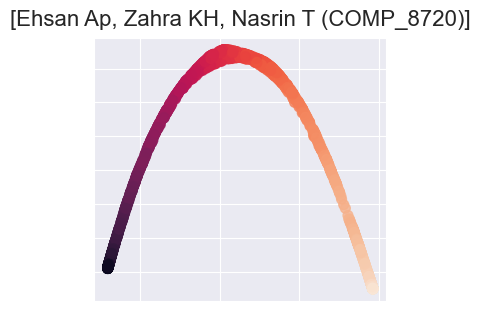

In [48]:
spectral = manifold.SpectralEmbedding(n_components=2, n_neighbors=20)
S_spectral = spectral.fit_transform(swiss_roll)

plot_2d(S_spectral, S_color, "[Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]")